## Exploar Data Analysis

In [51]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

### Import data

In [52]:
data = pd.read_csv("dataset_1st/training.csv")

In [53]:
data.head(5)

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label
0,1c09727c939eb69ead2a4ce4072b8aa18992a64f01fcb4...,46,101812,84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...,3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1529,0,0
1,2043f245a93bc6328dac964d6dbc89f13a0346062c194d...,17,85509,9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...,8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...,5,8.0,4356c6642ef6e837543b577c7ee3ffa92b4b8fcfb57254...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,...,0.0,15759.0,NaN,0,0,8.0,70.0,101,0,0
2,e4853710290a8409279f3279f8032ae670824bd19aa173...,44,212641,dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...,1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...,5,4.0,5b7eff061f8896aac4339ea35c25f8bb956a43bc486460...,8f6b3ff512a001e0d1988c6cd888ef8c74112fb71117e5...,288.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,116,0,0
3,74d811b1dbc28b22b73ba2c79bb6033791d913b6d27a25...,42,102702,577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...,4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...,5,1.0,cad752c5d05d2bdcc30d64fa4e68404c2d1f7be5d14d52...,36684976be1f529e6e2a32c9edab4cf8e364b2b916ae2c...,375.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,1683,0,0
4,68ca182343969d429d79a34e532bc1ca7a3cc032c2ad81...,31,185737,fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...,a3837f2905383f235a72679482c5f02e40f2a8ca29750d...,5,5.0,50d5b02ce3fc88723438c2a29cfdb04be4a1a11280ddb6...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,...,0.0,15759.0,NaN,0,0,6.0,70.0,14,0,0


### Columns index

In [54]:
print(data.columns)

Index(['txkey', 'locdt', 'loctm', 'chid', 'cano', 'contp', 'etymd', 'mchno',
       'acqic', 'mcc', 'conam', 'ecfg', 'insfg', 'iterm', 'bnsfg', 'flam1',
       'stocn', 'scity', 'stscd', 'ovrlt', 'flbmk', 'hcefg', 'csmcu', 'csmam',
       'flg_3dsmk', 'label'],
      dtype='object')


In [55]:
col_desc = pd.read_excel("31_資料欄位說明.xlsx", usecols="B:C", nrows = 27)

In [56]:
#print(col_desc)

In [57]:
description = [
    "Transaction Serial Number","Authorization Date","Authorization Time","Customer ID","Transaction Card Number","Transaction Type","Transaction Mode","Merchant Code","Acquiring Institution Code","MCC Code","Transaction Amount in TWD","Online Transaction Indicator","Installment Transaction Indicator","Installment Period","Bonus Transaction Indicator","Actual Payment Amount","Consumption Country Code","Consumption City Code","Status Code","Overlimit Indicator Code","Fallback Indicator","Payment Type","Consumption Currency Code","Consumption Amount","3D Transaction Indicator","Fraudulent Transaction Indicator"
]

In [58]:
col_desc["Description"] = description

### Column Description

In [59]:
col_desc

,訓練資料欄位名稱,訓練資料欄位中文說明,Description
0,txkey,交易序號,Transaction Serial Number
1,locdt,授權日期,Authorization Date
2,loctm,授權時間,Authorization Time
3,chid,顧客ID,Customer ID
4,cano,交易卡號,Transaction Card Number
5,contp,交易類別,Transaction Type
6,etymd,交易型態,Transaction Mode
7,mchno,特店代號,Merchant Code
8,acqic,收單行代碼,Acquiring Institution Code
9,mcc,mcc_code,MCC Code


### Authorization Date, locdt

In [222]:
data["locdt"].describe()

count                          8688526
mean     2023-10-29 12:00:17.680698368
min                2023-10-02 00:00:00
25%                2023-10-15 00:00:00
50%                2023-10-29 00:00:00
75%                2023-11-12 00:00:00
max                2023-11-26 00:00:00
Name: locdt, dtype: object

In [60]:
base_date = pd.to_datetime("2023-10-02")
data["locdt"] = base_date + pd.to_timedelta(data["locdt"], unit = "D")

Text(0.5, 1.0, 'Authorization Date Historgram')

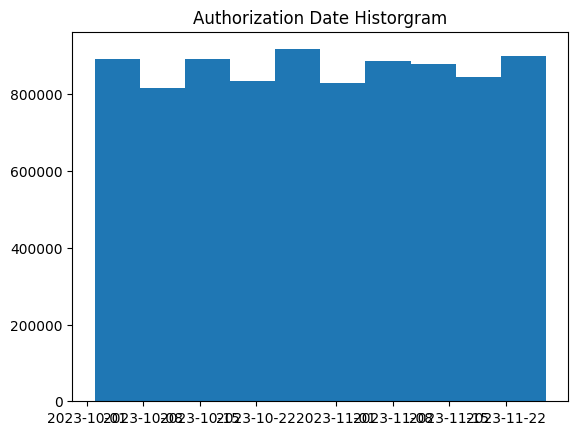

In [44]:
plt.hist(data["combined_datetime"])
plt.title("Authorization Date Historgram")

### Authorization Time, loctm

In [61]:
data["loctm"] = data['loctm'].astype(str).str.zfill(6)

In [62]:
data['loctm'] = data['loctm'].str[:2] + ":" + data['loctm'].str[2:4] + ":" + data['loctm'].str[4:]
data["loctm"] = pd.to_datetime(data["loctm"], format = "%H:%M:%S")

In [63]:
data["loctm"] = data["loctm"].dt.time

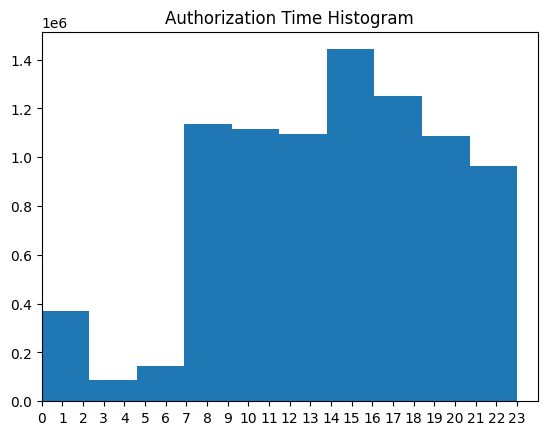

In [50]:
hour_lost = map(lambda x: x.hour, data["loctm"])

numbers=[x for x in range(0,24)]
labels=map(lambda x: str(x), numbers)

plt.xticks(numbers, labels)
plt.xlim(0,24)
plt.hist(hour_list)
plt.title("Authorization Time Histogram")
plt.show()
# 39.0s(for), 36.5s(map)

### Combined datetime

In [64]:
data["combined_datetime"] = pd.to_datetime(data["locdt"].astype(str)+" "+data["loctm"].astype(str))

### Customer ID, chid

In [72]:
print(data.loc[:5, "chid"])

0    84d2dc85d4da6a7fa284a11a4290d7e9a969163dcb4d82...
1    9a8cf5d0afd729cb7876f6b3172152c7c9c6fabd40515c...
2    dcc1389a5765d6f53152cf85970fbe78a83fd3d1c299b0...
3    577f2329d1eccd59ba0abaf6113bb78dcd575badcbc57f...
4    fff6b4126c40620b1fbb11d4de02cd67b9e95071caa40b...
5    7bccecefb9c0271fec1b07dcce8b64b8f24a8d45e16376...
Name: chid, dtype: object


In [86]:
n_unique = data["chid"].nunique()
print(f"Unique Costumer ID: {n_unique}")
print(f"Number of data: {len(data)}")

Unique Costumer ID: 482667
Number of data: 8688526


In [92]:
time_id = data["chid"].value_counts().value_counts()
# time_id = time_id.reset_index
print(time_id)

count
1       54944
2       44874
3       32556
4       27745
5       23027
        ...  
334         1
333         1
268         1
271         1
9577        1
Name: count, Length: 383, dtype: int64


In [110]:
time_id = time_id.sort_index()

<Axes: title={'center': 'Number of Transactions per Customer'}, ylabel='count'>

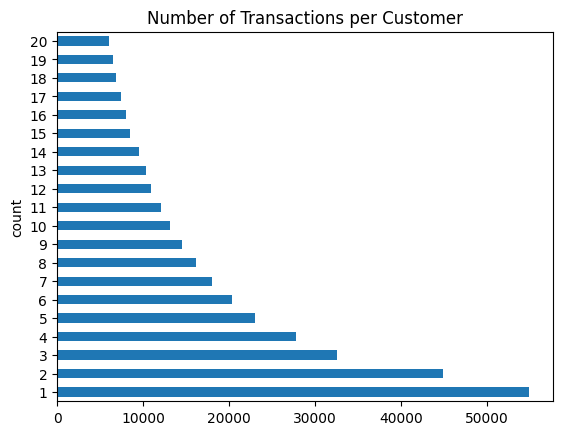

In [115]:
time_id[:20].plot(kind = "barh", title = "Number of Transactions per Customer")

### Transaction Card Number, cano

In [117]:
print(data["cano"].head())

0    3dd5bf1e29e5e0baa789ce692fe5dbd34ff05173acf351...
1    8cb13f9b38c7bbc02d210e580dcbbcbb6c95bf18bc3320...
2    1ec32868e5e1d5ff8df56737c2a91326cbfe3364382de6...
3    4359dca1ac6a835eceb2bc0dd6b0b710f030c3499126e9...
4    a3837f2905383f235a72679482c5f02e40f2a8ca29750d...
Name: cano, dtype: object


In [118]:
n_unique_cano = data["cano"].nunique()
print(f"Unique Transation Card Number: {n_unique_cano}")
print(f"Number of data: {len(data)}")

Unique Transation Card Number: 618898
Number of data: 8688526


In [124]:
time_cano = data["cano"].value_counts().value_counts().sort_index()
time_cano.head()

count
1    96721
2    73977
3    49428
4    40702
5    31668
Name: count, dtype: int64

<Axes: title={'center': 'Transaction Card Number Frequency Plot'}, ylabel='count'>

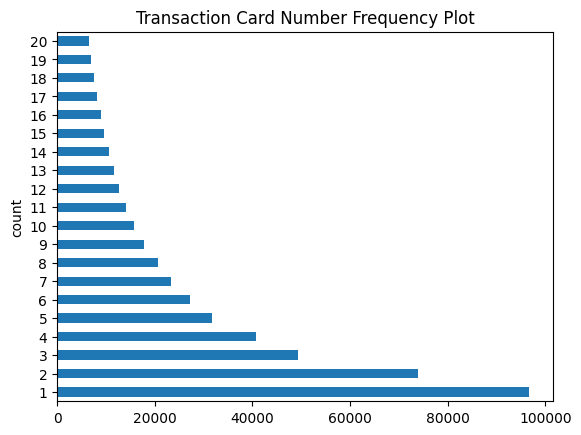

In [126]:
time_cano[:20].plot(kind = "barh", title = "Transaction Card Number Frequency Plot")

### Transaction Type, contp

In [128]:
data["contp"].value_counts()

contp
5    8162669
4     294966
2     186995
6      40766
3       2983
1         80
0         67
Name: count, dtype: int64

### Transaction Mode, etymd

In [130]:
data["etymd"].value_counts()

etymd
5.0     2463603
4.0     2446956
8.0     1980614
1.0     1283373
3.0      209619
0.0       85308
9.0       14873
2.0         577
10.0         85
7.0          63
Name: count, dtype: int64

### Merchant Code, mchno

In [136]:
time_mchno = data["mchno"].value_counts().value_counts().sort_index()
time_mchno

count
1         55215
2         21184
3         11696
4          8046
5          5932
          ...  
141589        1
158336        1
258558        1
323264        1
360832        1
Name: count, Length: 1485, dtype: int64

<Axes: title={'center': 'Merchant Code Frequency Plot'}, ylabel='count'>

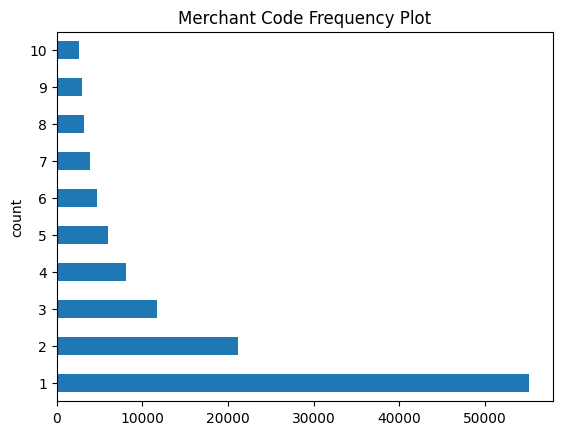

In [139]:
time_mchno[:10].plot(kind = "barh", title = "Merchant Code Frequency Plot")

### Acquiring Institution Code, acqic

In [144]:
time_acqic = data["acqic"].value_counts().value_counts().sort_index()
print(time_acqic)

count
1          1725
2          1569
3           703
4           769
5           417
           ... 
614070        1
669069        1
728958        1
793615        1
2220622       1
Name: count, Length: 442, dtype: int64


<Axes: title={'center': 'Acquiring Institution Code Frequency Plot'}, ylabel='count'>

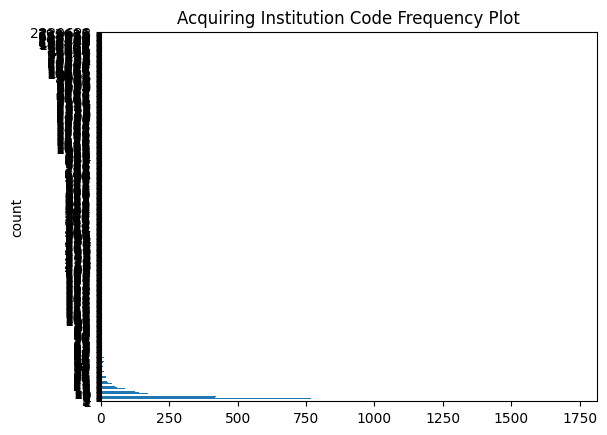

In [147]:
time_acqic[:].plot(kind = "barh", title = "Acquiring Institution Code Frequency Plot")

### MCC Code, mcc_code

In [167]:
def get_mcc_category(mcc_code):
    mcc_code = int(mcc_code)
    
    if 1 <= mcc_code <= 99:
        return "mcc1"
    elif 100 <= mcc_code <= 199:
        return "mcc2"
    elif 200 <= mcc_code <= 299:
        return "mcc3"  # You can continue this pattern for other ranges if needed
    elif 300 <= mcc_code <= 399:
        return "mcc4"
    elif 400 <= mcc_code <= 499:
        return "mcc5"
    else:
        return "unknown"

In [168]:
data["mcc_cat"] = data["mcc"].fillna(0).apply(get_mcc_category)

In [170]:
data["mcc_cat"].value_counts()

mcc_cat
mcc3       4446950
mcc4       3009610
mcc5       1203595
unknown      13369
mcc1         13018
mcc2          1984
Name: count, dtype: int64

### Transaction Amount in TWD, conam

In [173]:
data.conam.describe()

count    8.688526e+06
mean     1.418676e+03
std      9.518751e+03
min      0.000000e+00
25%      1.050000e+02
50%      3.150000e+02
75%      9.000000e+02
max      5.051970e+06
Name: conam, dtype: float64

Text(0.5, 1.0, 'Log Transaction Amount in TWD Histogram')

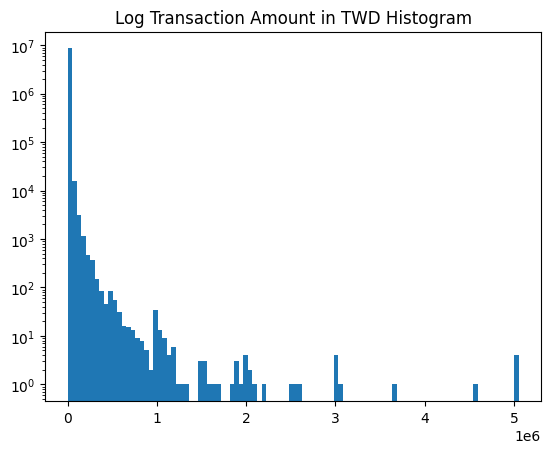

In [181]:
plt.hist(data["conam"], bins = 100, log = True)
plt.title("Log Transaction Amount in TWD Histogram")

### Online Transaction Indicator, ecfg

<Axes: title={'center': 'Online Transaction Indicator'}, ylabel='count'>

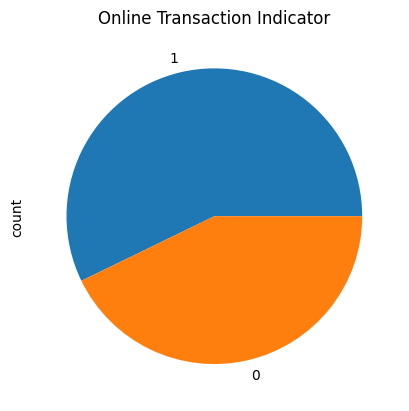

In [188]:
data["ecfg"].value_counts().plot(kind = "pie", title = "Online Transaction Indicator")

### Installment Transaction Indicator, insfg

In [191]:
data["insfg"].value_counts()

insfg
0    8596544
1      91982
Name: count, dtype: int64

### Installment Period, iterm

In [194]:
data["iterm"].value_counts()

iterm
0.0     8596569
3.0       41811
6.0       37699
12.0       6749
24.0       2050
5.0         809
10.0        639
30.0        596
9.0         540
8.0         488
18.0        298
13.0        248
1.0          17
15.0         13
Name: count, dtype: int64

### Bonus Transaction Indicator, bnsfg

In [196]:
data["bnsfg"].value_counts()

bnsfg
0    8677468
1      11058
Name: count, dtype: int64

### Actual Payment Amount, flam1

(array([8.666635e+06, 1.606000e+04, 3.183000e+03, 1.167000e+03,
        4.810000e+02, 3.700000e+02, 1.510000e+02, 9.000000e+01,
        4.500000e+01, 8.000000e+01, 6.000000e+01, 2.800000e+01,
        2.000000e+01, 1.300000e+01, 1.300000e+01, 9.000000e+00,
        9.000000e+00, 5.000000e+00, 2.000000e+00, 3.100000e+01,
        1.400000e+01, 1.000000e+01, 5.000000e+00, 5.000000e+00,
        2.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 3.000000e+00, 3.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 2.000000e+00, 2.000000e+00, 4.000000e+00,
        2.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 3.000000e+00,
        2.000000e+00, 0.000000e+00, 0.00

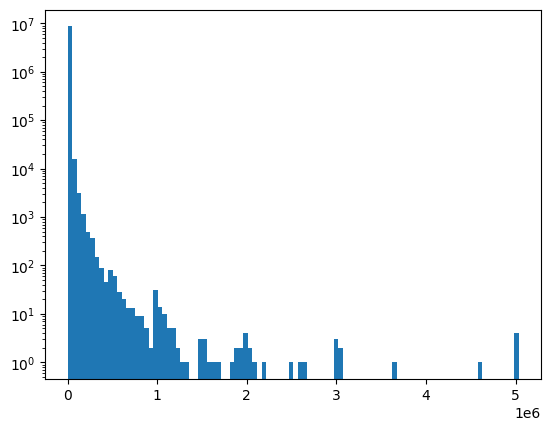

In [201]:
plt.hist(data["flam1"], bins = 100, log = True)
plt.title("Log Actual Payment Amount Histogram")

In [202]:
### Consumption Country Code, stocn

In [203]:
data["stocn"].value_counts()  # taiwan is 0

stocn
0.0      7827990
126.0     292409
54.0      207011
42.0      114421
113.0      89760
          ...   
1.0            1
125.0          1
23.0           1
19.0           1
18.0           1
Name: count, Length: 122, dtype: int64

### Consumption City Code, scity

In [205]:
data["scity"].value_counts().value_counts().sort_index()

count
1          5291
2          2085
3           934
4           590
5           377
           ... 
183163        1
191376        1
244079        1
505054        1
4646717       1
Name: count, Length: 433, dtype: int64

### Status Code, stscd

In [208]:
data["stscd"].value_counts()

stscd
1.0    22385
0.0      799
2.0      132
4.0       13
3.0        2
Name: count, dtype: int64

In [210]:
n_stscd_na = data["stscd"].isna().sum()
print(f"Number of Status Code is NA: {n_stscd_na}")

Number of Status Code is NA: 8665195


### Overlimit Indicator Code, ovrlt

In [212]:
data["ovrlt"].value_counts()

ovrlt
0    8603884
1      84642
Name: count, dtype: int64

### Fallback Indicator, flbmk

In [213]:
data["flbmk"].value_counts()

flbmk
0    8685869
1       2657
Name: count, dtype: int64

### Payment Type, hcefg

In [214]:
data["hcefg"].value_counts()

hcefg
6.0     7321872
0.0      758808
1.0      184851
3.0       51551
8.0       35638
9.0       35320
7.0       10696
5.0        2479
4.0         490
2.0         159
10.0          6
Name: count, dtype: int64

### Consumption Currency Code, csmcu

In [215]:
data["csmcu"].value_counts()

csmcu
70.0    7947443
68.0     122569
81.0      27575
29.0      27074
76.0      12450
         ...   
80.0          2
5.0           1
21.0          1
83.0          1
4.0           1
Name: count, Length: 79, dtype: int64

### Consumption Amount, csmam

Text(0.5, 1.0, 'Log Consumption Amount Histogram')

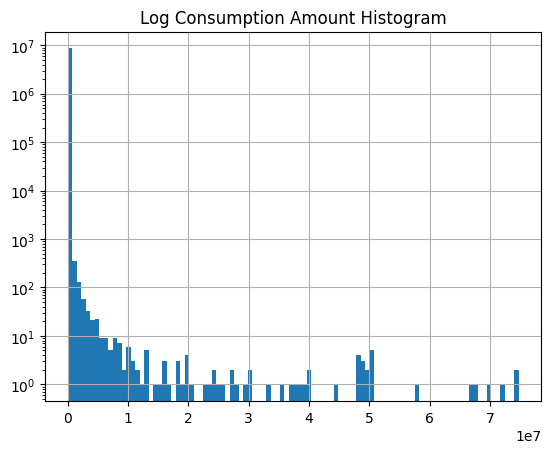

In [218]:
data["csmam"].hist(bins = 100, log = True)
plt.title("Log Consumption Amount Histogram")

### 3D Transaction Indicator, flag3dsmk

In [219]:
data["flg_3dsmk"].value_counts()

flg_3dsmk
0    7947335
1     741191
Name: count, dtype: int64

### Fraudulent Transaction Indicator, label

In [220]:
data["label"].value_counts()

label
0    8656497
1      32029
Name: count, dtype: int64

In [221]:
data[data["label"] == 1]

,txkey,locdt,loctm,chid,cano,contp,etymd,mchno,acqic,mcc,...,stscd,ovrlt,flbmk,hcefg,csmcu,csmam,flg_3dsmk,label,combined_datetime,mcc_cat
318,7773d6012a013a75d57891ba6dd96f464e04720b9d699c...,2023-10-02,19:04:57,daa8a8317da29b57bdf4038e4f8fd0045abf6e243ef674...,729e7c22f215b148059aad0c3330c42229a19a9c903a30...,5,5.0,8e0715389f1c3cd9adcced919dbb1f1c92f8dafd05e297...,0da01078a40a585345bd9d206baa06d04a3922f49dbb4c...,482.0,...,NaN,0,0,6.0,70.0,5752,0,1,2023-10-02 19:04:57,mcc5
339,cded61d4f4c719c1a418e8348509763f1591b6f7f7d3f7...,2023-11-20,20:48:14,aeb7e3ab2215c11b34efeee8fa5c1a72742b7489ba56c8...,6e24b73cc930180063defee19fdbb7387c08de69402679...,5,8.0,45b6cb170af96950ffd009b6275bb22f5f5b052687d237...,c6a68a6677409cd8b8e909a2b2766ed5f26668e9862631...,324.0,...,1.0,0,0,6.0,70.0,33,0,1,2023-11-20 20:48:14,mcc4
881,78bcabfbe831b5057b5be29501e50c3e95a0f777146f8c...,2023-10-21,04:30:49,3066a98db35965f368b6512e276c4c3f955fa1fba549c2...,0100b4635ad916e18bf45695ae16253ceb91f95877ff96...,5,8.0,b253ccf9c434f01d5846178c20f59770d766f353a1c778...,7ea0f4070f276e8b279de9149f68786379d6dc6f22a094...,276.0,...,1.0,0,0,6.0,68.0,0,0,1,2023-10-21 04:30:49,mcc3
1576,8722c91641e9c08e31fd94bf094be60f6bc10df05c6b84...,2023-11-18,21:33:35,504690b6f6fdd4c27124319b5321866b67337ef27f6d74...,f89d9e642995c0d4a37c9caefd0414e51d0b1e74828d5d...,5,5.0,8fea3ea4c8f8fcb2897d04ebe7bcab255ed0667ee64c3d...,e3871e67cc9ec2fe2cb87aee527916320011d36ecea9c1...,390.0,...,NaN,0,0,6.0,81.0,38,0,1,2023-11-18 21:33:35,mcc4
1598,21c86f81f00a2aa393f649a1b189254b89d8c5afa292b3...,2023-10-16,21:34:13,184d4a1082c12a7678c692770ef87a0dfcec07c253dc75...,15135e9adc9e8726e14d9bf7d405085e0f6ad7a5384c2b...,5,5.0,c91612f3ba877a29a666cd46fab188786f589bdf762177...,be45a208827a6053177338a0a414f2a2a47f9646c42c58...,324.0,...,1.0,0,0,6.0,70.0,1797,0,1,2023-10-16 21:34:13,mcc4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686800,d00b17a3c71c968e7ff511fe1c0b2915a72aacab5a3e04...,2023-11-19,03:39:14,eff2a413fddd460ddefcb186e4775f815c938bc2f92176...,1a55443b737a54230e0c3069167d02a59c8b2456caa9d9...,5,8.0,be65bda7376198327a41ae452b4a8d670fb82d70adc708...,23c27dd987158a60ae9ae09a369a38650479f8d09f8a42...,324.0,...,1.0,0,0,6.0,70.0,50,0,1,2023-11-19 03:39:14,mcc4
8686969,459a285e001dfed37e213fcd9a2b46373796a686ad4ab5...,2023-10-28,10:03:01,4ac6885f906d965c02b68fd47757d360eacce11d91be21...,140d32f86dff24e04f3766cf127d24706a0516ae903f34...,4,5.0,9504a99e5d6aba04a98373ba3dc3dbf61aafcb78b2a8dc...,33d25c5a639595625b14c2803597c5c32fbdc93ff04113...,352.0,...,NaN,0,0,6.0,70.0,773,0,1,2023-10-28 10:03:01,mcc4
8687406,d445af80114da7348d32dfcf0cef49d2fdfee3effdaa36...,2023-10-16,09:57:53,499734f4ca9457b66fd90432398d6485bb6619517f2cb6...,4586ccaf109d8573183e566f3f17e9e95e96cac5e3d234...,4,1.0,376eb9b31fcc9b78d9fca9c1b4962c6bfb173ec29f72e2...,87bb2c3786f575b9b24f5fa9487d8c3de4b79abe537bd0...,353.0,...,NaN,0,0,6.0,68.0,0,0,1,2023-10-16 09:57:53,mcc4
8687798,179f57a3ca3a9a7f629162322d97a34655fdb34ea9963d...,2023-11-15,06:37:07,a1373ef76a9679d7626b7df3df6db3490d74889aedfdea...,155189178c7d1be2a44189562210c9acc479666c3fc180...,5,1.0,45b6cb170af96950ffd009b6275bb22f5f5b052687d237...,839aa8d49064459ddd81fcb39ca4e3420577b8faa0db91...,324.0,...,NaN,0,0,6.0,70.0,491,0,1,2023-11-15 06:37:07,mcc4
